Aperçu des données:
      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

Biais (intercept) : 2.979067338122629
Coefficients (w) : [0.04472952 0.18919505 0.00276111]

Mean Absolute Error : 1.4607567168117603
Root Mean Square Error : 1.78159966153345
R2 Score : 0.899438024100912


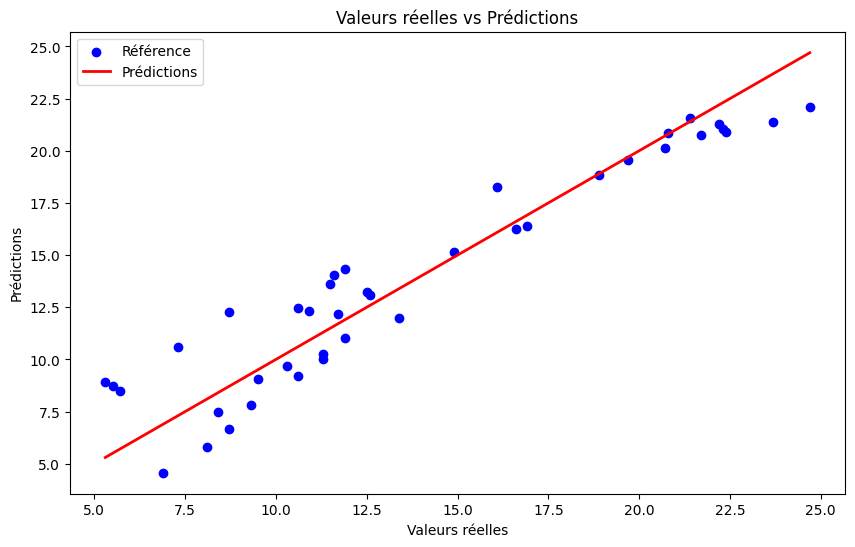

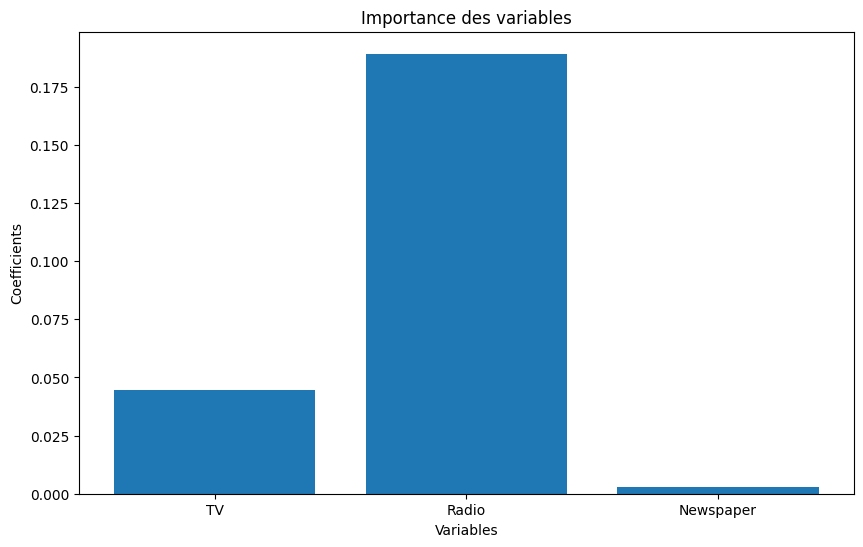

In [4]:
# Résolution du problème Advertising avec scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Chargement des données
df = pd.read_csv('../Advertising.csv', index_col=0)


# Aperçu des données
print("Aperçu des données:")
print(df.head())

# Sélection des features et de la variable cible
X = df.iloc[:, :3]  # TV, Radio, Newspaper
y = df.iloc[:, 3]   # Sales

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création et entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = model.predict(X_test)

# Affichage des coefficients du modèle
print("\nBiais (intercept) :", model.intercept_)
print("Coefficients (w) :", model.coef_)

# Calcul des métriques d'évaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nMean Absolute Error :", mae)
print("Root Mean Square Error :", rmse)
print("R2 Score :", r2)

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'red', linewidth=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Valeurs réelles vs Prédictions')
plt.legend(['Référence', 'Prédictions'])
plt.show()

# Visualisation de l'importance des variables
plt.figure(figsize=(10, 6))
plt.bar(['TV', 'Radio', 'Newspaper'], model.coef_)
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Importance des variables')
plt.show()